In [9]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
from sklearn import preprocessing
from scipy.special import expit
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [2]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [3]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1994,12,0.474,0.2180,0,-15.822,1,0.0352,0.222000,0.000013,0.0693,0.3530,154.145,3
1,2008,29,0.105,0.9340,1,-3.727,1,0.0808,0.000002,0.000230,0.1370,0.0506,173.241,4
2,1997,39,0.365,0.6190,11,-7.763,0,0.0412,0.041900,0.000034,0.0862,0.1380,173.873,3
3,2007,26,0.503,0.4370,0,-11.420,1,0.0292,0.335000,0.000003,0.1310,0.2380,147.896,4
4,1995,0,0.644,0.0974,3,-19.673,1,0.3580,0.718000,0.000000,0.2910,0.3180,119.506,4


In [4]:
data["Popularity"].astype(str).astype(int)
data['Popularity_bucket']=data.Popularity.map(lambda x: x/10).apply(np.floor).astype(int)
data.head(10)

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_bucket
0,1994,12,0.474,0.2180,0,-15.822,1,0.0352,0.222000,0.000013,0.0693,0.3530,154.145,3,1
1,2008,29,0.105,0.9340,1,-3.727,1,0.0808,0.000002,0.000230,0.1370,0.0506,173.241,4,2
2,1997,39,0.365,0.6190,11,-7.763,0,0.0412,0.041900,0.000034,0.0862,0.1380,173.873,3,3
3,2007,26,0.503,0.4370,0,-11.420,1,0.0292,0.335000,0.000003,0.1310,0.2380,147.896,4,2
4,1995,0,0.644,0.0974,3,-19.673,1,0.3580,0.718000,0.000000,0.2910,0.3180,119.506,4,0
5,1961,21,0.600,0.2560,7,-12.922,1,0.0446,0.514000,0.000000,0.1030,0.7090,126.076,4,2
6,1986,4,0.455,0.1340,5,-19.378,1,0.0284,0.452000,0.000045,0.1290,0.2550,74.555,4,0
7,2013,35,0.792,0.9060,11,-4.180,0,0.1660,0.055200,0.000000,0.1300,0.5220,97.503,4,3
8,1976,1,0.232,0.4300,7,-14.853,0,0.0385,0.821000,0.900000,0.1110,0.2650,136.499,4,0
9,2017,15,0.666,0.0991,7,-20.918,0,0.0861,0.422000,0.255000,0.0789,0.3690,130.906,4,1


In [5]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.8*len(data)), int(.9*len(data))])

In [6]:
# Split output and convert to array
train_output = train_data.Popularity_bucket
train_data = train_data.drop(['Popularity_bucket'], axis=1)
train_data = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])

validate_output = validate_data.Popularity_bucket
validate_data = validate_data.drop(['Popularity_bucket'], axis=1)
validate_data = np.asarray(validate_data,dtype=np.float64)
validate_count = len(validate_data[:,0])

test_output = test_data.Popularity_bucket
test_data = test_data.drop(['Popularity_bucket'], axis=1)
test_data = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])

In [7]:
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
# activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
# learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp = MLPClassifier(hidden_layer_sizes=(14, 8,),solver='adam', activation='tanh',max_iter=50)
mlp.fit(train_data,train_output)

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

[2.286313546708876, 2.0790749043061636, 1.9754760476404658, 1.8953326553365721, 1.846896812013558, 1.7960318004644027, 1.7498738672881295, 1.6934461502677864, 1.5944152015767878, 1.5113674764982767, 1.4377380823433648, 1.3531815946165215, 1.2943464610614963, 1.222602189959911, 1.1727732898889278, 1.13220733931026, 1.0812645561386545, 1.0560875364295699, 1.0152088530276697, 0.9915474941096629, 0.9929242486017236, 0.9613774375143264, 0.9467093078890854, 0.9377789189159607, 0.9099591773944417, 0.9042988927483014, 0.9216748113270194, 0.8884400323744651, 0.8774620691439027, 0.8758421303868541, 0.8658357119171434, 0.8783829742139784, 0.8631433467851084, 0.8482028014245964, 0.8640741307380749, 0.8526864807370735, 0.8598166534288236, 0.8500165913737467, 0.8402083673236964, 0.8271636611887409, 0.8246947465137372, 0.8554745603735752, 0.8877005365504579, 0.8352250581138253, 0.8260582695449458, 0.8305832640774905, 0.8189351284311003, 0.8136135843829129, 0.809502340350996, 0.8159208414006496]


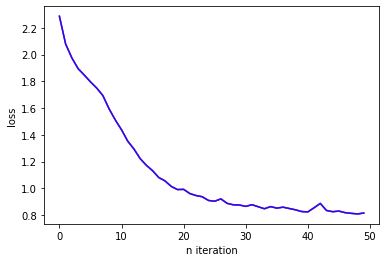

In [12]:
loss_values = mlp.loss_curve_
loss_values_test = mlp_t.loss_curve_
loss_values_valid = mlp_v.loss_curve_
plt.xlabel("n iteration")
plt.ylabel("loss")
print(loss_values)
plt.plot(loss_values,color='green', alpha=0.8, label='Train')
plt.plot(loss_values_test,color='magenta', alpha=0.8, label='Test')
plt.plot(loss_values_valid,color='blue', alpha=0.8, label='Validation')
plt.show()

In [131]:
test_pred = mlp.predict(test_data)
print("Testing set score: {}".format(mlp.score(test_data,test_output)))

Testing set score: 0.21162981162981162


In [132]:
print("accuracy score of training: {}".format(accuracy_score(train_output,mlp.predict(train_data))))
print("accuracy score of testing: {}".format(accuracy_score(test_output,mlp.predict(test_data))))
print("accuracy score of validating: {}".format(accuracy_score(validate_output,mlp.predict(validate_data))))

accuracy score of training: 0.20542643595781715
accuracy score of testing: 0.21162981162981162
accuracy score of validating: 0.209043250327654


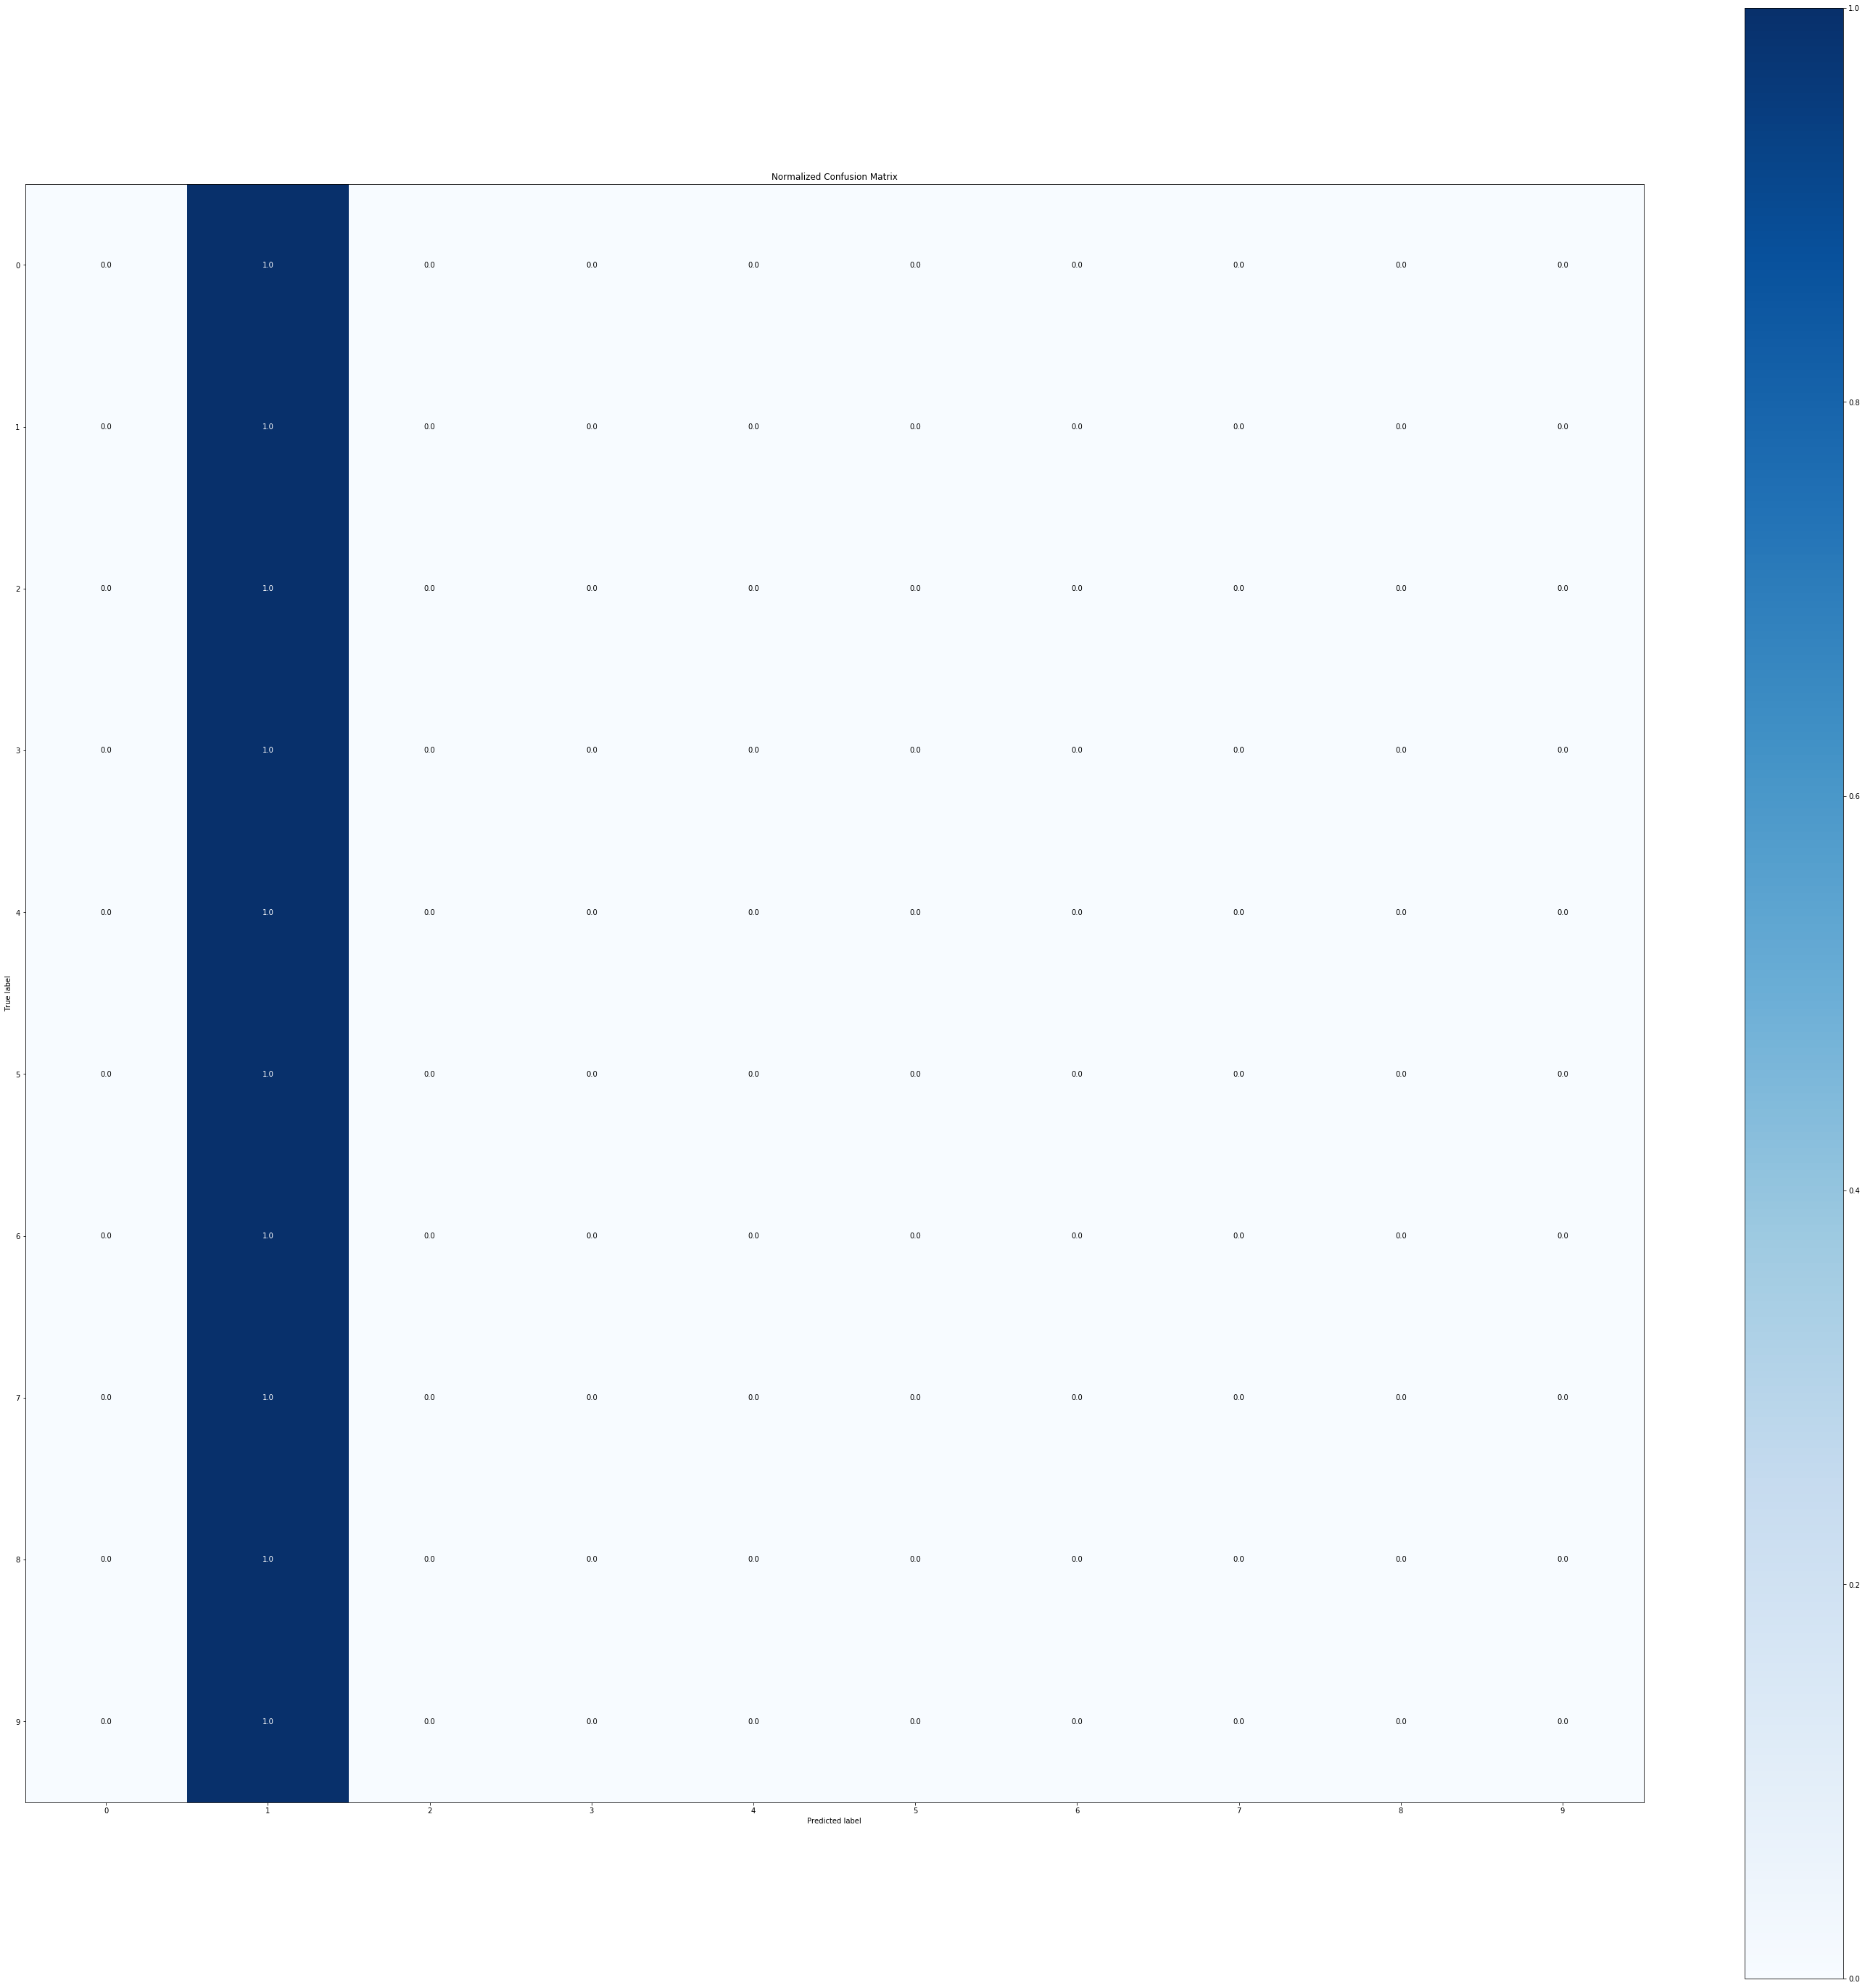

In [134]:
skplt.metrics.plot_confusion_matrix(test_output, test_pred, normalize=True, figsize=(50,50))

In [28]:
N_TRAIN_SAMPLES = train_data.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(train_output)

scores_train = []
scores_test = []
scores_validate = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(train_data.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        #indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(train_data, train_output, classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(train_data, train_output))

    # SCORE TEST
    scores_test.append(mlp.score(test_data, test_output))
    
    # SCORE validate
    scores_validate.append(mlp.score(validate_data, validate_output))

    epoch += 1


epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


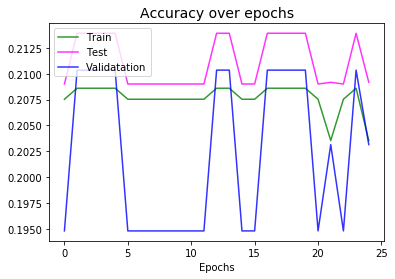

In [29]:
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.plot(scores_validate, color='blue', alpha=0.8, label='Validatation')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

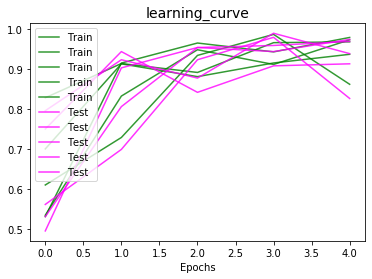

In [9]:
cv = ShuffleSplit(n_splits=5, test_size=0.004, random_state=0)
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(MLPClassifier(), train_data, train_output, cv=cv, n_jobs=1,
                       train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ],
                       return_times=True)

plt.plot(train_scores, color='green', alpha=0.8, label='Train')
plt.plot(test_scores, color='magenta', alpha=0.8, label='Test')
#plt.plot(scores_validate, color='blue', alpha=0.8, label='Validatation')
plt.title("learning_curve", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

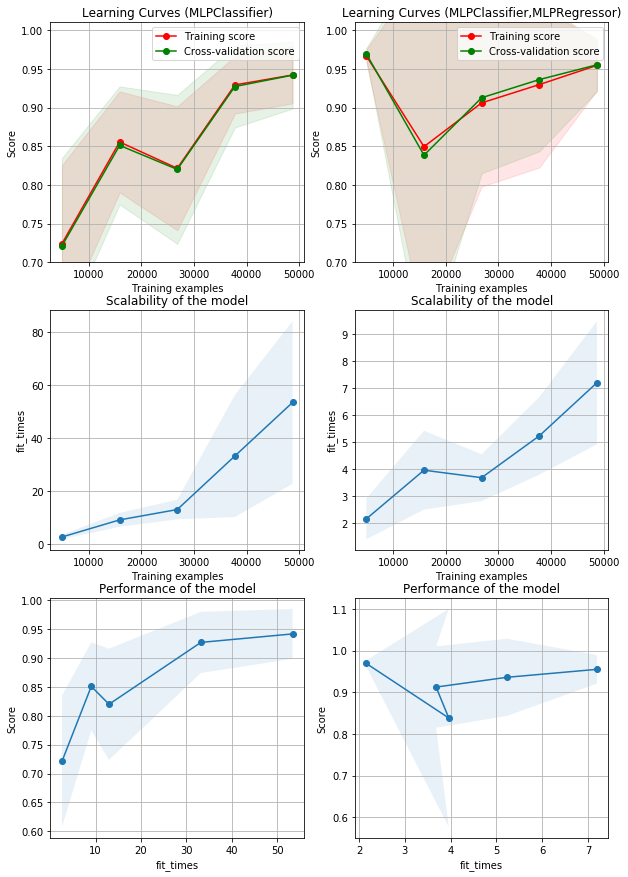

In [10]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, train_data, train_output, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (MLPClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.002, random_state=0)

estimator = MLPClassifier()
plot_learning_curve(estimator, title, train_data, train_output, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (MLPClassifier,MLPRegressor)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.002, random_state=0)
estimator = MLPRegressor()
plot_learning_curve(estimator, title, train_data, train_output, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()